#**House Price Prediction**
***
**Problem statement**

The goal is to understand the relationship between house features and how these
variables affect the house price.

**Metric**

Models are evaluated on **`Mean-Squared-Error(RMSE)`** between the logarithm of the predicted value and the logarithm of the observed sales price. Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.

##Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Getting Data

In [26]:
df = pd.read_excel('/content/drive/MyDrive/data/Shack_Labs_Assignment/DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [ ]:
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

*  There are no missing values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
House Age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
Distance from nearest Metro station (km),414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
Number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Number of bedrooms,414.0,1.987923,0.818875,1.000000,1.000000,2.000000,3.000000,3.000000
House size (sqft),414.0,931.475845,348.910269,402.000000,548.000000,975.000000,1234.750000,1500.000000
House price of unit area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


Observations

*  Most of the houses have 2 bedrooms
*  Age of the houses ranges from 0 to 43 years 
*  Average of 4 stores are located near the houses
*  Price of the houses ranges from 7.6 to 117.500 with an average of 38.00
*  23.5 km is the shortest distance of house from metro station 

## Data Preprocessing

In [ ]:
for i in df.columns:
  print('Distribution of '+i)
  print(df[i].value_counts())
  print('-'*60)

Distribution of Transaction date
2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.333333    29
2013.000000    28
2012.750000    27
2013.166667    25
2013.583333    23
Name: Transaction date, dtype: int64
------------------------------------------------------------
Distribution of House Age
0.0     17
13.6     7
13.3     6
16.2     6
16.4     6
        ..
30.2     1
4.3      1
24.0     1
8.4      1
18.8     1
Name: House Age, Length: 236, dtype: int64
------------------------------------------------------------
Distribution of Distance from nearest Metro station (km)
289.32480     13
90.45606      11
492.23130      9
1360.13900     8
104.81010      8
              ..
4527.68700     1
401.88070      1
432.03850      1
472.17450      1
390.96960      1
Name: Distance from nearest Metro station (km), Length: 259, dtype: int64
------------------------------------------------------------
Distribution of Number 

Observations
*  Each category of bedrooms have almost equall number of houses
*  Number of stores ranges from 0 to 10 
*  Transaction date needs to be verify

In [ ]:
df['Transaction date'] = df['Transaction date'].astype(int)
df['Transaction date'].value_counts()

2013    288
2012    126
Name: Transaction date, dtype: int64

* Most of the houses were sold in 2013

In [27]:
## creating bins for House age and House price of unit area

df['houseagebin'] = pd.cut(df['House Age'], bins = [-0.01,10.00, 20.00, 30.00, 40.00, 50.00], labels = ['0-10','11-20', '21-30', '31-40', '41-50'])

df['housepricebin'] = pd.cut(df['House price of unit area'],bins=[0,20,40,70,100,130],
                                     labels=['<20','<40','<70','<100','<130'])

In [ ]:
df['houseagebin'].value_counts()

11-20    167
0-10     110
31-40     86
21-30     43
41-50      8
Name: houseagebin, dtype: int64

In [ ]:
df['housepricebin'].value_counts()

<40     188
<70     184
<20      36
<100      5
<130      1
Name: housepricebin, dtype: int64

Observations

*  Approx 75 percent of house have age ranging from 0-20
*  90 percent of the houses comes under 20-70 units in price

## Data Visualization

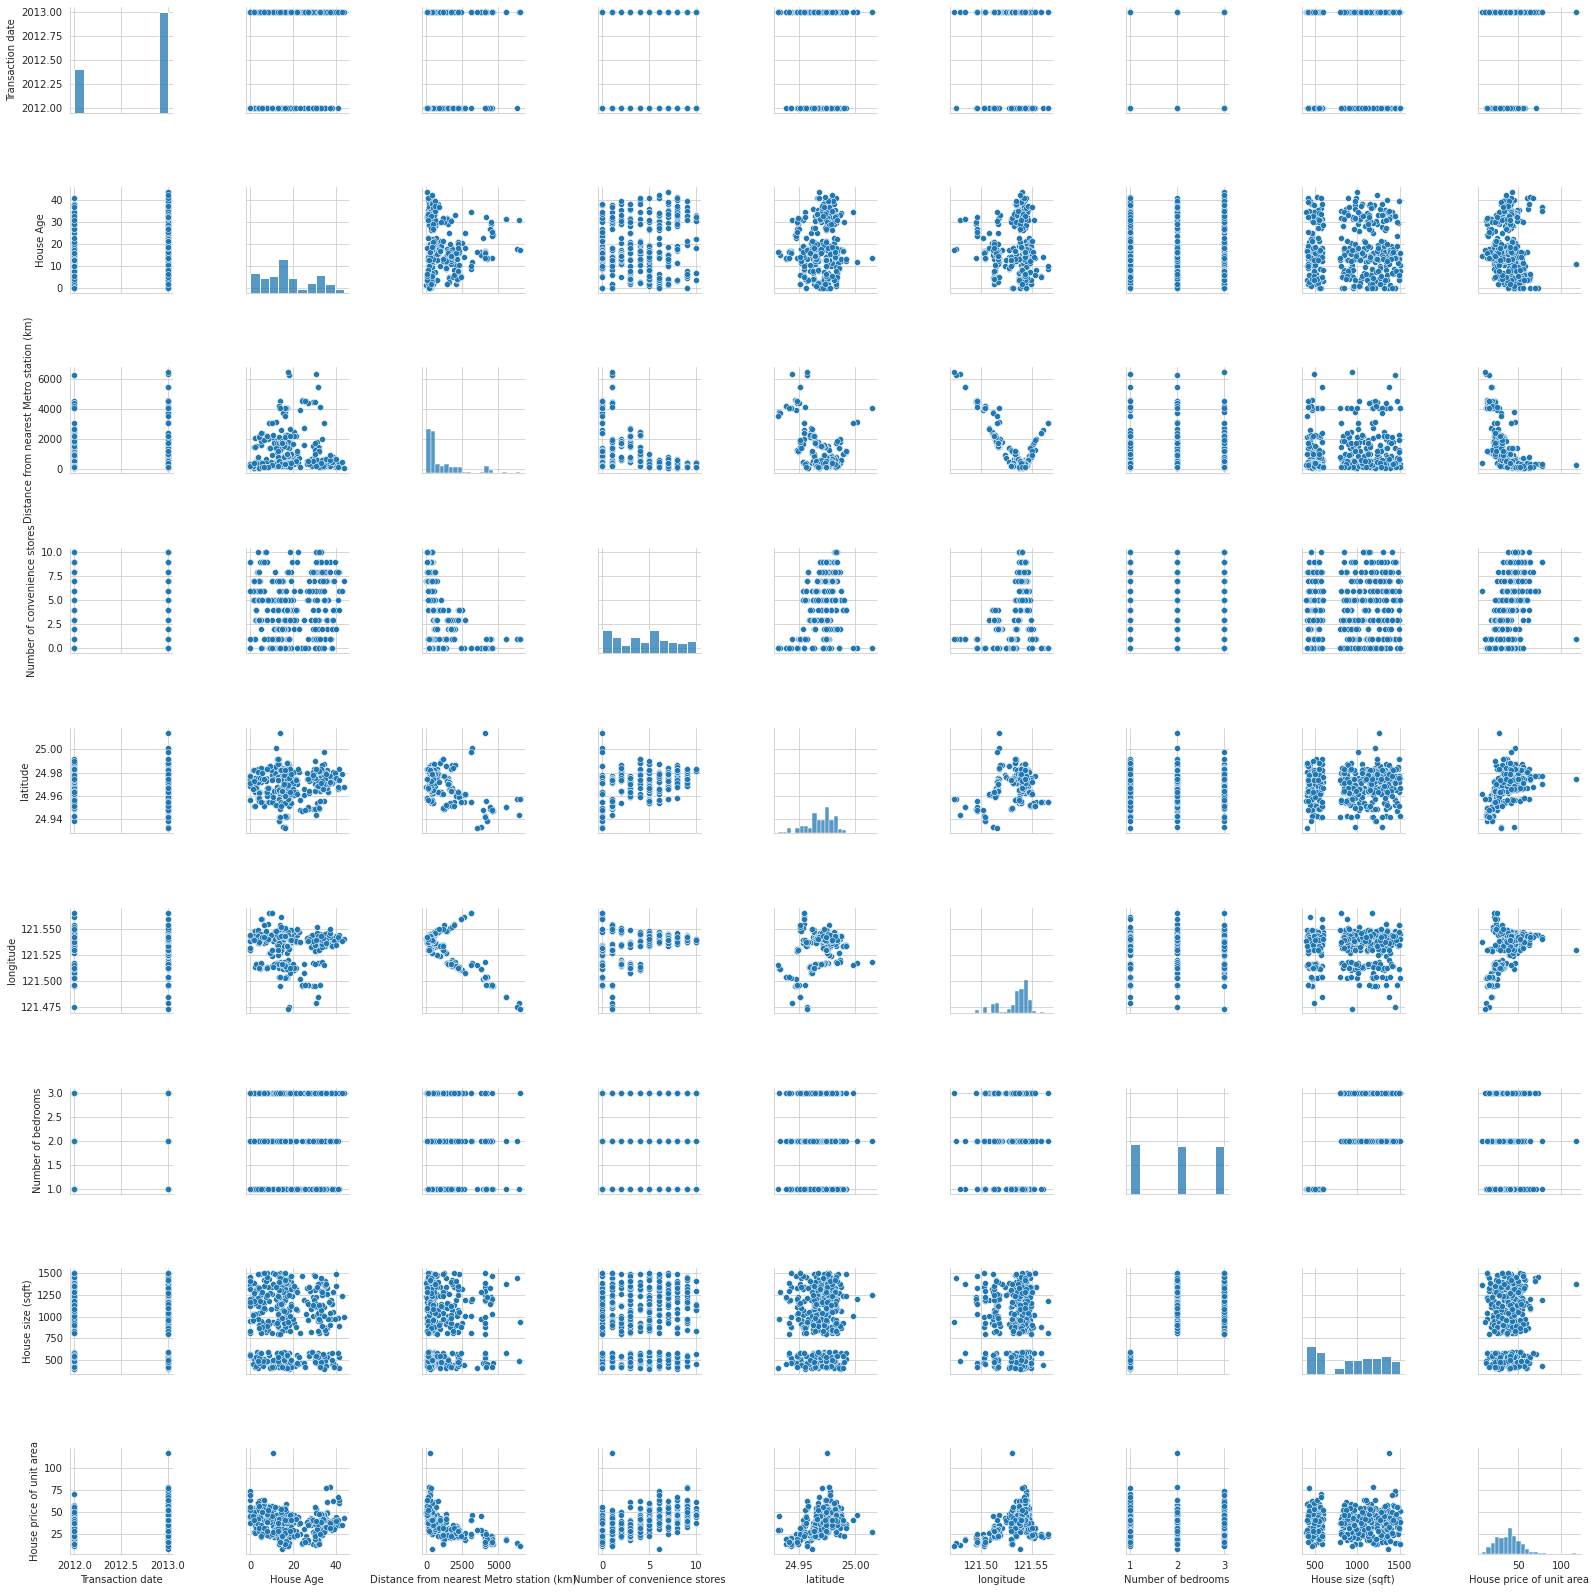

In [ ]:
sns.pairplot(data=df)
plt.show()

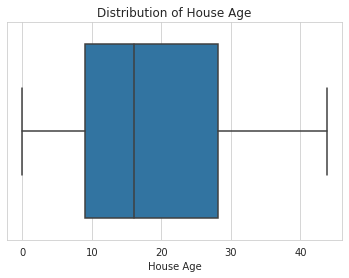

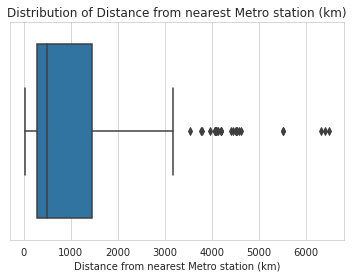

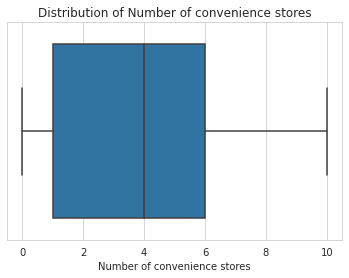

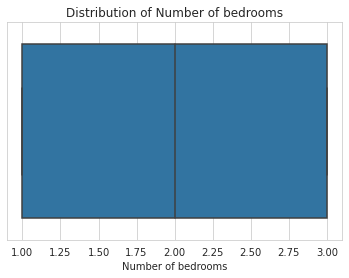

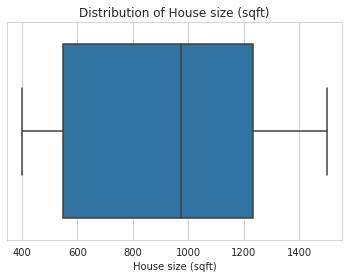

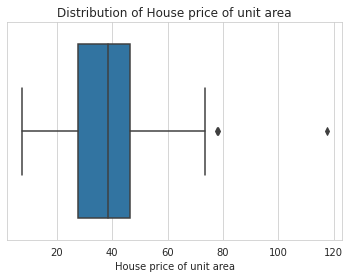

In [28]:
sns.set_style('whitegrid')

df1 = df.drop(['Transaction date','latitude','longitude','houseagebin','housepricebin'],axis=1)
for i in df1.columns:
  sns.boxplot(x=df1[i])
  plt.title('Distribution of '+i)
  plt.show()

Observations
*  Not much outliers are present in the data
*  `Distance from nearest metro station (km)` and `House price of unit area` have outliers, needs to review data

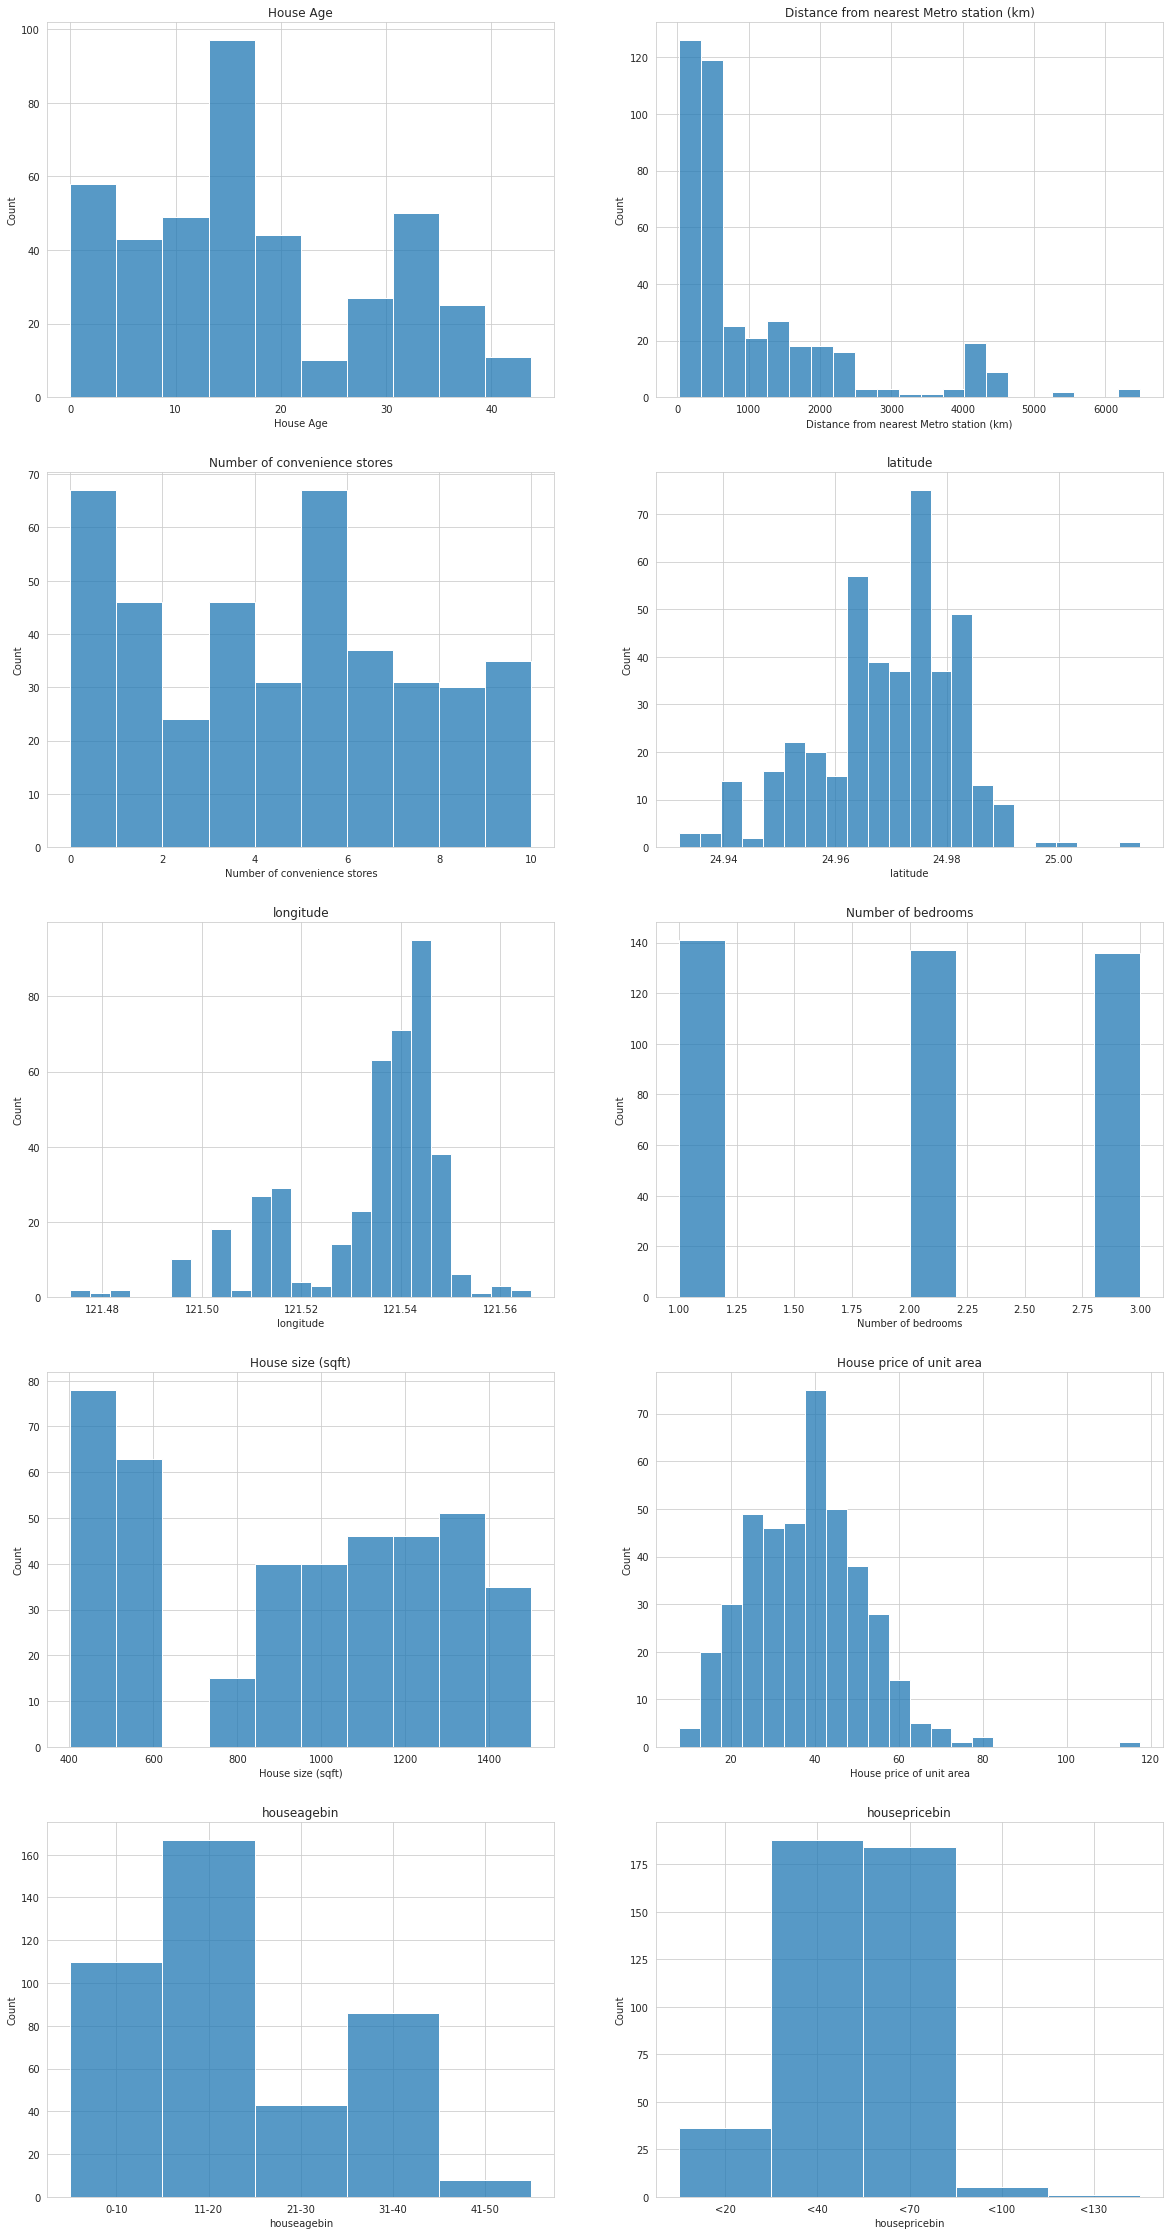

In [ ]:
cols = df.drop('Transaction date',axis=1).columns

fig,([ax0,ax1],[ax2,ax3],[ax4,ax5],[ax6,ax7],[ax8,ax9]) = plt.subplots(ncols=2,nrows=5,figsize=(20,40))

ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
for i in range(0,10):

  sns.histplot(data=df,x=cols[i],ax=ax[i],palette='coolwarm')
  ax[i].set_title(cols[i])



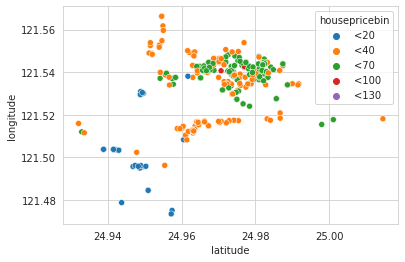

In [ ]:
sns.scatterplot(x=df['latitude'],y=df['longitude'],hue=df['housepricebin'])

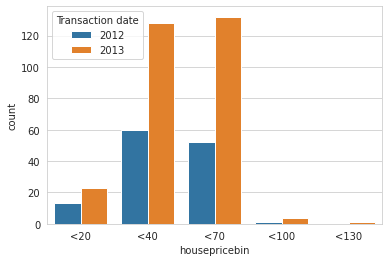

In [ ]:
sns.countplot(x=df['housepricebin'],hue=df['Transaction date'])

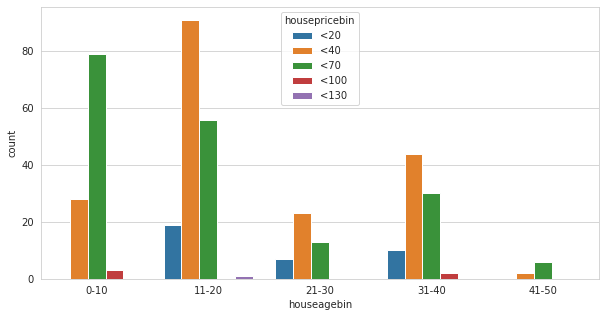

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['houseagebin'],hue=df['housepricebin'])

Observations
* If the  age is 0-10 then price mostly ranges between 40-100
* only the house age between 11-20 exceeds the price of 100
* Houses in a particular region  belongs to the price range of <20 


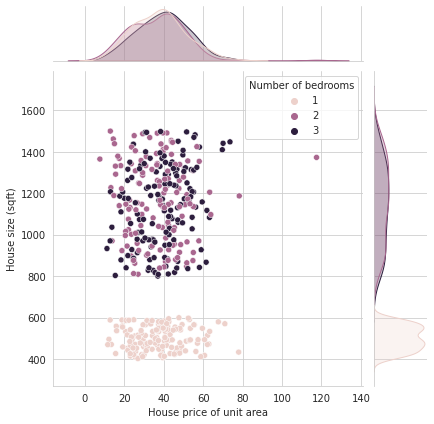

In [ ]:
sns.jointplot(hue=df['Number of bedrooms'],y=df['House size (sqft)'],x=df['House price of unit area'])

* Houses with 1 bedroom have an area ranging from 400-600(sqft) 


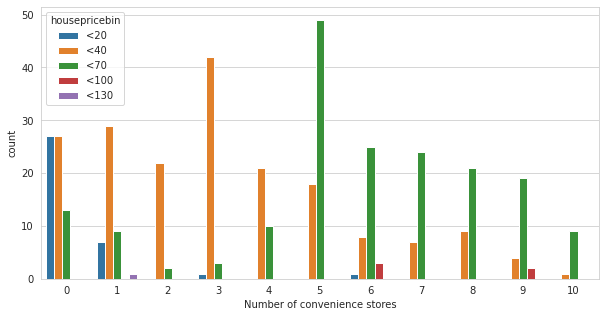

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Number of convenience stores'],hue=df['housepricebin'])

*  Seems like house with less convenience stores have comparitevly low price

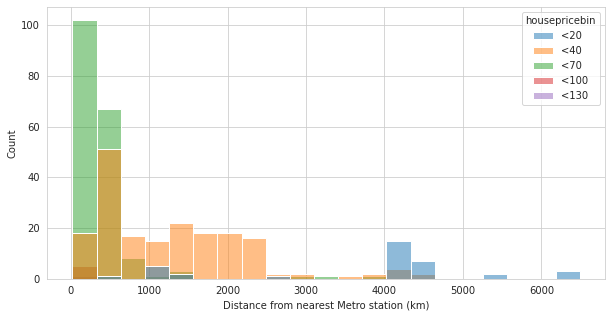

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['Distance from nearest Metro station (km)'],hue=df['housepricebin'])

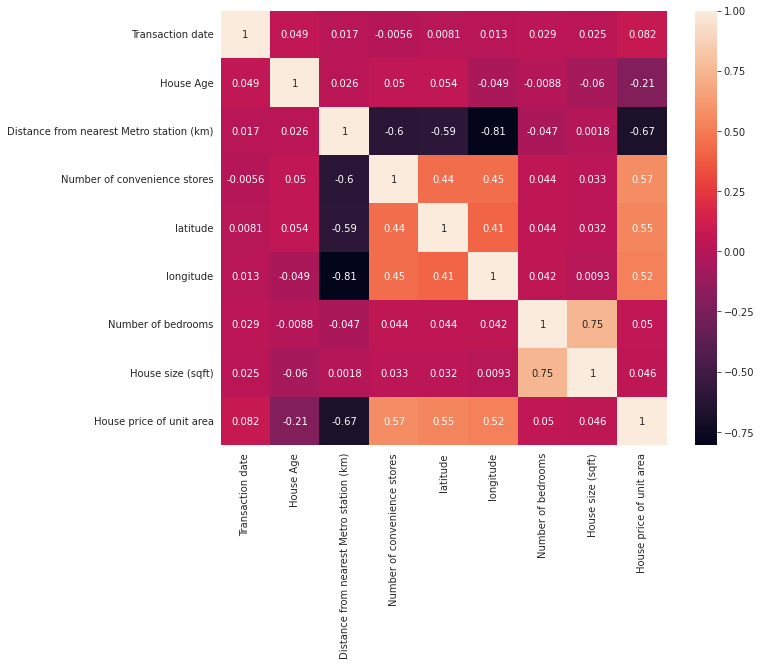

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

## Data Handling

**Outlier Detection**

Using Inter Quantile Range (IQR)

In [29]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3-q1

lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [30]:
((df.select_dtypes(include=['float64','int64'])<lower) | (df.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df)*100

Transaction date                            0.000000
House Age                                   0.000000
Distance from nearest Metro station (km)    8.937198
Number of convenience stores                0.000000
latitude                                    1.932367
longitude                                   8.454106
Number of bedrooms                          0.000000
House size (sqft)                           0.000000
House price of unit area                    0.724638
dtype: float64

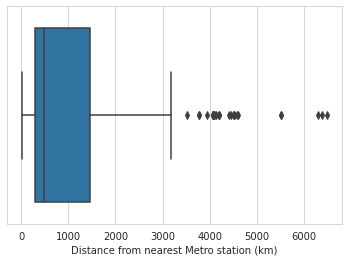

In [ ]:
sns.boxplot(x=df['Distance from nearest Metro station (km)'])

In [31]:
df.drop(index=df[df['Distance from nearest Metro station (km)']>3200].index,inplace=True)

## Splitting Dataset

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x = df.drop(['houseagebin','housepricebin','House price of unit area'],axis=1)
y = df['House price of unit area']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((301, 8), (301,), (76, 8), (76,))

##Running Model Experiments

* Model0: Linear Regression(Baseline)
* Model1: Support Vector Machines(SVR)
* Model2: Ensemble methods(Random Forest Regressor)
* Model3: Dense Neural Network

In [35]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###Model0: Linear Regression(Baseline)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
# training model

np.random.seed(42)

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
# model performance

from sklearn.metrics import mean_squared_log_error

def model_evaluation(model):
  np.random.seed(42)
  print('Model Evaluation on Train Data')
  train_preds = model.predict(x_train)
  train_score = mean_squared_log_error(y_train,train_preds)
  print('Mean Squared Log Error on Train Data : '+str(train_score))
  print('\n'*3)
  print('Model Evaluation on Test Data')
  test_preds = model.predict(x_test)
  test_score = mean_squared_log_error(y_test,test_preds)
  print('Mean Squared Log Error on Test Data : '+str(test_score))
  return train_score,test_score

In [39]:
a = model_evaluation(lr)

Model Evaluation on Train Data
Mean Squared Log Error on Train Data : 0.04482130601492181




Model Evaluation on Test Data
Mean Squared Log Error on Test Data : 0.041427801010827235


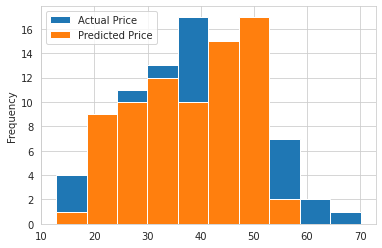

In [40]:
pd.DataFrame(data={'Actual Price':y_test,'Predicted Price':lr.predict(x_test)}).plot(kind='hist')

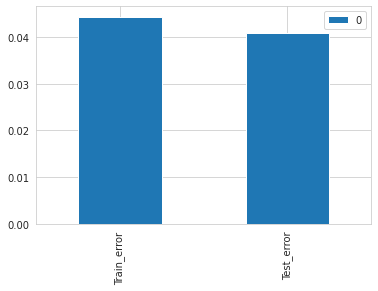

In [ ]:
data = pd.DataFrame(index=['Train_error','Test_error'],data=[a[0],a[1]])
data.plot(kind='bar')

Observations
*  Linear Regression is performing better on test data as compared on train data
*  Data might not be linear seprable thats why the model is not performing very well


###Model1: Support Vector Machine(SVR)


In [41]:
from sklearn.svm import SVR

In [42]:
# training model

np.random.seed(42)

svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [43]:
a = model_evaluation(svr)

Model Evaluation on Train Data
Mean Squared Log Error on Train Data : 0.04530835292727977




Model Evaluation on Test Data
Mean Squared Log Error on Test Data : 0.04869653370583937


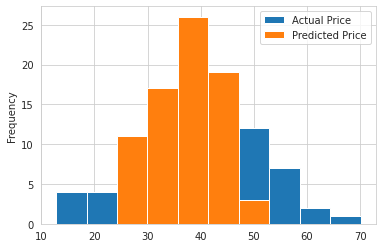

In [47]:
pd.DataFrame(data={'Actual Price':y_test,'Predicted Price':svr.predict(x_test)}).plot(kind='hist')

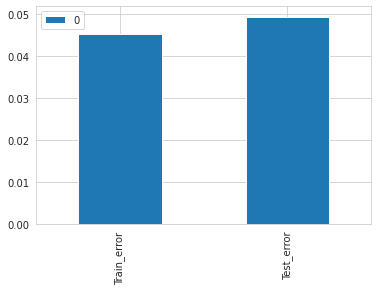

In [ ]:
data = pd.DataFrame(index=['Train_error','Test_error'],data=[a[0],a[1]])
data.plot(kind='bar')

Observations
*  Used Support Vector Machine for non linear data.
*  SVR is performing worse than our Linear Regression Model(Baseline)


###Model2: Ensemble methods(Random Forest Regressor)

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
# training model

np.random.seed(42)

rfr = RandomForestRegressor(n_estimators=700)
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=700)

In [50]:
a = model_evaluation(rfr)

Model Evaluation on Train Data
Mean Squared Log Error on Train Data : 0.006023193152050239




Model Evaluation on Test Data
Mean Squared Log Error on Test Data : 0.024533871070984706


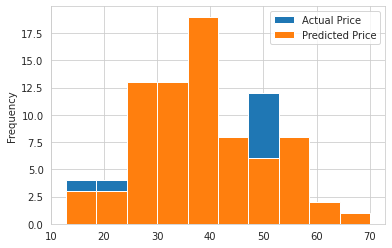

In [51]:
pd.DataFrame(data={'Actual Price':y_test,'Predicted Price':rfr.predict(x_test)}).plot(kind='hist')

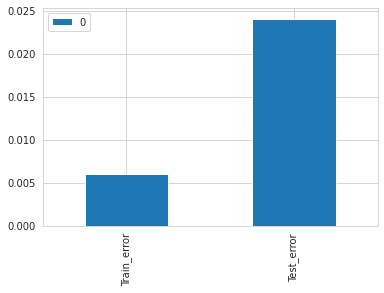

In [ ]:
data = pd.DataFrame(index=['Train_error','Test_error'],data=[a[0],a[1]])
data.plot(kind='bar')

Observations
*  seems like model is overfitting
*  Model is performing well than other models till now

   

###Model3: Dense Neural Network

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout

# creating a model
tf.keras.backend.clear_session()

inputs = tf.keras.Input(shape=(8,))

x = Dense(128,activation='relu')(inputs)
x = Dense(128,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,activation='relu')(x)

outputs = Dense(1)(x)

model = tf.keras.Model(inputs,outputs)

## compiling the model

model.compile(loss='mean_squared_logarithmic_error',
              optimizer = 'adam',
              metrics = ['mean_squared_logarithmic_error'])

## summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 25,985
Trainable params: 25,985
Non-trainable p

In [63]:
# creating callback
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=5,mode='min')

In [64]:
# fitting the data

model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=100,callbacks=[early_stop])

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 11.6788 - mean_squared_logarithmic_error: 11.6788 - val_loss: 8.6294 - val_mean_squared_logarithmic_error: 8.6294
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 7.2331 - mean_squared_logarithmic_error: 7.2331 - val_loss: 5.0508 - val_mean_squared_logarithmic_error: 5.0508
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 4.1468 - mean_squared_logarithmic_error: 4.1468 - val_loss: 2.6046 - val_mean_squared_logarithmic_error: 2.6046
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 2.1350 - mean_squared_logarithmic_error: 2.1350 - val_loss: 1.2369 - val_mean_squared_logarithmic_error: 1.2369
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 1.0414 - mean_squared_logarithmic_error: 1.0414 - val_loss: 0.5839 - val_mean_squared_logarithmic_error: 0.5839
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss:

In [69]:
a = model_evaluation(model)

Model Evaluation on Train Data
10/10 [==============================] - 0s 5ms/step
Mean Squared Log Error on Train Data : 0.03414314873142776




Model Evaluation on Test Data
3/3 [==============================] - 0s 5ms/step
Mean Squared Log Error on Test Data : 0.03855464001991719


3/3 [==============================] - 0s 6ms/step


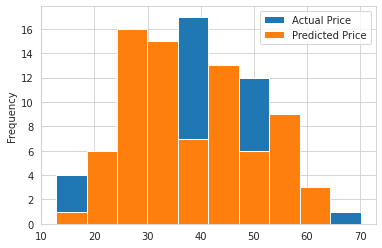

In [74]:
pd.DataFrame(data={'Actual Price':y_test,'Predicted Price':tf.squeeze(model.predict(x_test))}).plot(kind='hist')

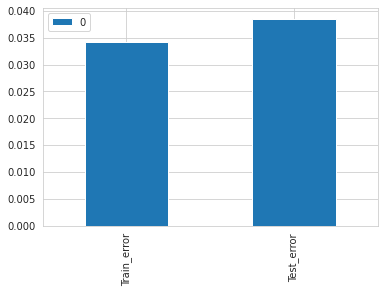

In [75]:
data = pd.DataFrame(index=['Train_error','Test_error'],data=[a[0],a[1]])
data.plot(kind='bar')

## Conclusion



In [76]:
df_con = pd.DataFrame(data={'Train_error':[0.04482130601492181,0.04530835292727977,0.006023193152050239,0.03414314873142776],
                            'Test_error':[0.041427801010827235,0.04869653370583937,0.024533871070984706,0.03855464001991719]},
                      index=['Model0: Linear Regression(Baseline)','Model1: Support Vector Machine(SVR)',
                             'Model2: Ensemble methods(Random Forest Regressor)','Model3: Dense Neural Network'])
df_con

,Train_error,Test_error
Model0: Linear Regression(Baseline),0.044821,0.041428
Model1: Support Vector Machine(SVR),0.045308,0.048697
Model2: Ensemble methods(Random Forest Regressor),0.006023,0.024534
Model3: Dense Neural Network,0.034143,0.038555


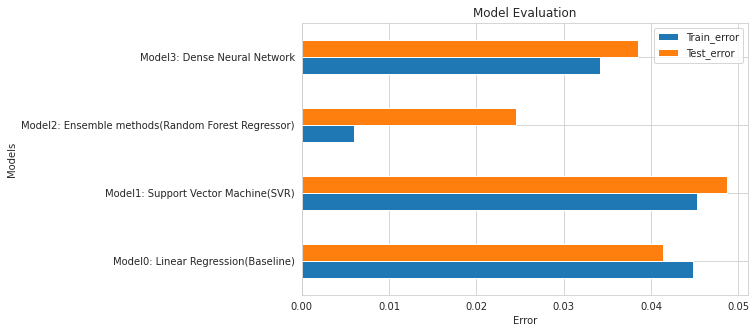

In [101]:
df_con.plot(kind='barh',figsize=(8,5))
plt.ylabel('Models')
plt.xlabel('Error')
plt.title('Model Evaluation')
plt.show()

**Conclusion**
* **`Model2: Ensemble methods(Random Forest Regressor)`** seems to be overfitting but also performing best among all the models
*  Needs more data for more precise evaluation
*  **`Model3: Dense Neural Network`** is also performing good, can use for prediction